In [1]:
import json

f = open('twitter-data-newww.json',)
data = json.load(f)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(data)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities
0,Thu Nov 12 17:27:57 +0000 2020,1326939803829501952,1326939803829501952,Belum jg memanfaatkan penuh eh udah dikasih ad...,False,"[0, 148]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1.326727e+18,1326727445429407744,{'created_at': 'Thu Nov 12 03:24:07 +0000 2020...,0,0,False,False,False,in,NaN
1,Thu Nov 12 17:05:53 +0000 2020,1326934251229511680,1326934251229511680,@rk_eza Bank besar knp ga promosi segencar ban...,False,"[8, 231]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326731e+18,...,NaN,NaN,NaN,0,0,False,False,NaN,in,NaN
2,Thu Nov 12 15:55:42 +0000 2020,1326916590810456064,1326916590810456064,Nemu lagi di reddit perbandingan fitur bank be...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.326746e+18,...,NaN,NaN,NaN,0,1,False,False,False,in,"{'media': [{'id': 1326915917402529795, 'id_str..."
3,Thu Nov 12 15:21:04 +0000 2020,1326907872681267200,1326907872681267200,@elshilda Cimb niaga kah?,False,"[10, 25]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326851e+18,...,NaN,NaN,NaN,0,0,False,False,NaN,in,NaN
4,Thu Nov 12 15:20:18 +0000 2020,1326907681681137665,1326907681681137665,@AdiKurniawanr Bapak dapat datang ke kantor ca...,False,"[15, 145]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://www.namemo.com"" rel=""nofollow""...",1.326907e+18,...,NaN,NaN,NaN,0,0,False,False,NaN,in,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,Wed Nov 04 06:02:03 +0000 2020,1323868088287207425,1323868088287207425,"@mumunskie Hai, adakah anda merujuk kepada CIM...",False,"[11, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://www.namemo.com"" rel=""nofollow""...",1.323868e+18,...,NaN,NaN,NaN,0,0,False,False,NaN,in,NaN
274,Wed Nov 04 05:47:56 +0000 2020,1323864536185663488,1323864536185663488,@dwTYQHSwTMUhBTB Selamat siang First People....,False,"[19, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://lnfb.firstmedia.com"" rel=""nof...",1.323864e+18,...,NaN,NaN,NaN,0,0,False,False,NaN,in,NaN
275,Wed Nov 04 05:47:25 +0000 2020,1323864408959770624,1323864408959770624,@faisal_rofik @KAI121 Kebetulan itu pesennya d...,False,"[22, 165]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.323859e+18,...,NaN,NaN,NaN,0,0,False,False,NaN,in,NaN
276,Wed Nov 04 05:13:09 +0000 2020,1323855782740258817,1323855782740258817,@TanyaOCBCNISP Brp biaya pembayaran tagihan ka...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://play.google.com/store/apps/de...",NaN,...,NaN,NaN,NaN,0,0,False,False,NaN,in,NaN


In [4]:
words_list = df['full_text'].values.tolist()
print(words_list)

['Belum jg memanfaatkan penuh eh udah dikasih admin fee. Yaudah lah saya fokus ke CIMB Niaga On Account yg punya fasilitas on par buat substitusinya 😆 https://t.co/JFaGn7tULI', '@rk_eza Bank besar knp ga promosi segencar bank gurem kayak Jenius BTPN, Digibank DBS, dst ya 😂 padahal beberapa punya fleksibilitas on par dg rekening digital, cem CIMB Niaga On Account dan Permata ME tapi nak2 mude jarang yg tau~', 'Nemu lagi di reddit perbandingan fitur bank bebas biaya admin: Jenius, digibank by DBS, TMRW by UOB, &amp; OCTO by CIMB Niaga https://t.co/JzSGRmLz7Q', '@elshilda Cimb niaga kah?', '@AdiKurniawanr Bapak dapat datang ke kantor cabang CIMB Niaga terdekat dengan membawa KTP asli dan nomor HP baru pengganti. Terima kasih - Erlang', '@matchaluph Terima kasih kembali Bapak/ Ibu, kami informasikan untuk kartu debit CIMB Niaga bisa dilakukan untuk pembayaran online dengan syarat kartu sudah berlogo mastercard dan untuk berlangganan menggunakan kartu debit CIMB Niaga saat ini belum bisa. T

In [5]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

clean_text = df.full_text[0:]

clean_result = []
for t in clean_text:
    clean_result.append(tweet_cleaner(t))
clean_result

['belum jg memanfaatkan penuh eh udah dikasih admin fee yaudah lah saya fokus ke cimb niaga on account yg punya fasilitas on par buat substitusinya',
 'eza bank besar knp ga promosi segencar bank gurem kayak jenius btpn digibank dbs dst ya padahal beberapa punya fleksibilitas on par dg rekening digital cem cimb niaga on account dan permata me tapi nak mude jarang yg tau',
 'nemu lagi di reddit perbandingan fitur bank bebas biaya admin jenius digibank by dbs tmrw by uob octo by cimb niaga',
 'cimb niaga kah',
 'bapak dapat datang ke kantor cabang cimb niaga terdekat dengan membawa ktp asli dan nomor hp baru pengganti terima kasih erlang',
 'terima kasih kembali bapak ibu kami informasikan untuk kartu debit cimb niaga bisa dilakukan untuk pembayaran online dengan syarat kartu sudah berlogo mastercard dan untuk berlangganan menggunakan kartu debit cimb niaga saat ini belum bisa terima kasih lody',
 'beli masker dan alat kesehatan di octo vending cimb niaga',
 'maaf sebelum nya saya tidak 

In [6]:
clean_df = pd.DataFrame(clean_result,columns=['full_text'])
clean_df['date'] = df.created_at

clean_df.head()

,full_text,date
0,belum jg memanfaatkan penuh eh udah dikasih ad...,Thu Nov 12 17:27:57 +0000 2020
1,eza bank besar knp ga promosi segencar bank gu...,Thu Nov 12 17:05:53 +0000 2020
2,nemu lagi di reddit perbandingan fitur bank be...,Thu Nov 12 15:55:42 +0000 2020
3,cimb niaga kah,Thu Nov 12 15:21:04 +0000 2020
4,bapak dapat datang ke kantor cabang cimb niaga...,Thu Nov 12 15:20:18 +0000 2020


In [7]:
clean_df.to_csv('twitter-data-clean3.csv',encoding='utf-8')
csv = 'twitter-data-clean3.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,full_text,date
0,belum jg memanfaatkan penuh eh udah dikasih ad...,Thu Nov 12 17:27:57 +0000 2020
1,eza bank besar knp ga promosi segencar bank gu...,Thu Nov 12 17:05:53 +0000 2020
2,nemu lagi di reddit perbandingan fitur bank be...,Thu Nov 12 15:55:42 +0000 2020
3,cimb niaga kah,Thu Nov 12 15:21:04 +0000 2020
4,bapak dapat datang ke kantor cabang cimb niaga...,Thu Nov 12 15:20:18 +0000 2020


In [8]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
my_dic = {"tdk":"tidak", "blm":"belum", "jg":"juga", "trs":"terus", "tp":"tapi",
          "rp":"rupiah", "&amp":"dan","knp":"kenapa","dst":"dan seterusnya","dg":"dengan",
          "dgn":"dengan", "dpt":"dapat", "jng":"jangan","jgn":"jangan", "kl":"kalau",
          "klo":"kalau", "yg":"yang", "trf":"transfer", "tf":"transfer", "bgt":"banget",
          "brp":"berapa", "knp":"kenapa", "jt":"juta", "lwt":"lewat", "cc":"credit card",
          "sy":"saya", "tks":"thanks", "jan":"januari", "apr":"april", "agt":"agustus",
          "sept":"september", "okt":"oktober", "nov":"november", "des":"desember",
          "utk":"untuk", "fb":"facebook", "tw":"twitter", "ig":"instagram",
          "gaminat":"ga minat", "bank bca":"", "bank bni":"", "bank mandiri":"",
          "bank danamon":"", "bali banks":"", "bca":"", "bni":"", "danamon":""}
# "lawsuit":"gugatan", "won":"menang"
my_pattern = re.compile(r'\b(' + '|'.join(my_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    my_handled = my_pattern.sub(lambda x: my_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", my_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

clean_text = df.full_text[0:]

clean_result = []
for t in clean_text:
    clean_result.append(tweet_cleaner_updated(t))
clean_result

my_df['clean_ft'] = clean_result

In [9]:
from nltk.corpus import stopwords
stopwords = stopwords.words('indonesian')

In [10]:
my_df['no_stopwords_ft'] = my_df['clean_ft'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [11]:
my_df

,full_text,date,clean_ft,no_stopwords_ft
0,belum jg memanfaatkan penuh eh udah dikasih ad...,Thu Nov 12 17:27:57 +0000 2020,belum juga memanfaatkan penuh eh udah dikasih ...,memanfaatkan penuh eh udah dikasih admin fee y...
1,eza bank besar knp ga promosi segencar bank gu...,Thu Nov 12 17:05:53 +0000 2020,bank besar kenapa ga promosi segencar bank gur...,bank ga promosi segencar bank gurem kayak jeni...
2,nemu lagi di reddit perbandingan fitur bank be...,Thu Nov 12 15:55:42 +0000 2020,nemu lagi di reddit perbandingan fitur bank be...,nemu reddit perbandingan fitur bank bebas biay...
3,cimb niaga kah,Thu Nov 12 15:21:04 +0000 2020,cimb niaga kah,cimb niaga kah
4,bapak dapat datang ke kantor cabang cimb niaga...,Thu Nov 12 15:20:18 +0000 2020,bapak dapat datang ke kantor cabang cimb niaga...,kantor cabang cimb niaga terdekat membawa ktp ...
...,...,...,...,...
273,hai adakah anda merujuk kepada cimb malaysia a...,Wed Nov 04 06:02:03 +0000 2020,hai adakah anda merujuk kepada cimb malaysia a...,hai adakah merujuk cimb malaysia cimb niaga in...
274,selamat siang first people untuk pembayaran la...,Wed Nov 04 05:47:56 +0000 2020,selamat siang first people untuk pembayaran la...,selamat siang first people pembayaran langsung...
275,rofik kebetulan itu pesennya di tokped sama bl...,Wed Nov 04 05:47:25 +0000 2020,kebetulan itu pesennya di tokped sama bl trus ...,pesennya tokped bl trus dimasukin kai access k...
276,brp biaya pembayaran tagihan kartu kredit cimb...,Wed Nov 04 05:13:09 +0000 2020,berapa biaya pembayaran tagihan kartu kredit c...,biaya pembayaran tagihan kartu kredit cimb nia...


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

tweet_stem = my_df['no_stopwords_ft'].apply(lambda x: " ".join(stemmer.stem(x) for x in x.split()))
tweet_stem

0      manfaat penuh eh udah kasih admin fee yaudah f...
1      bank ga promosi gencar bank gurem kayak jenius...
2      nemu reddit banding fitur bank bebas biaya adm...
3                                         cimb niaga kah
4      kantor cabang cimb niaga dekat bawa ktp asli n...
                             ...                        
273     hai ada rujuk cimb malaysia cimb niaga indonesia
274    selamat siang first people bayar langsung via ...
275    sen tokped bl trus dimasukin kai access krena ...
276    biaya bayar tagih kartu kredit cimb niaga apli...
277    diskon makan minum nanny pavillon credit card ...
Name: no_stopwords_ft, Length: 278, dtype: object

In [13]:
type(tweet_stem)

pandas.core.series.Series

In [14]:
clean_df['full_text'] = tweet_stem
clean_df['date'] = df.created_at

clean_df

,full_text,date
0,manfaat penuh eh udah kasih admin fee yaudah f...,Thu Nov 12 17:27:57 +0000 2020
1,bank ga promosi gencar bank gurem kayak jenius...,Thu Nov 12 17:05:53 +0000 2020
2,nemu reddit banding fitur bank bebas biaya adm...,Thu Nov 12 15:55:42 +0000 2020
3,cimb niaga kah,Thu Nov 12 15:21:04 +0000 2020
4,kantor cabang cimb niaga dekat bawa ktp asli n...,Thu Nov 12 15:20:18 +0000 2020
...,...,...
273,hai ada rujuk cimb malaysia cimb niaga indonesia,Wed Nov 04 06:02:03 +0000 2020
274,selamat siang first people bayar langsung via ...,Wed Nov 04 05:47:56 +0000 2020
275,sen tokped bl trus dimasukin kai access krena ...,Wed Nov 04 05:47:25 +0000 2020
276,biaya bayar tagih kartu kredit cimb niaga apli...,Wed Nov 04 05:13:09 +0000 2020


In [15]:
# my_df['stemmed_ft'] = tweet_stem
# my_df

In [16]:
clean_df.to_csv('twitter-data-clean4.csv',encoding='utf-8')
csv = 'twitter-data-clean4.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,full_text,date
0,manfaat penuh eh udah kasih admin fee yaudah f...,Thu Nov 12 17:27:57 +0000 2020
1,bank ga promosi gencar bank gurem kayak jenius...,Thu Nov 12 17:05:53 +0000 2020
2,nemu reddit banding fitur bank bebas biaya adm...,Thu Nov 12 15:55:42 +0000 2020
3,cimb niaga kah,Thu Nov 12 15:21:04 +0000 2020
4,kantor cabang cimb niaga dekat bawa ktp asli n...,Thu Nov 12 15:20:18 +0000 2020


In [17]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  278 non-null    object
 1   date       278 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


In [18]:
my_df[my_df.isnull().any(axis=1)].head()

,full_text,date


In [19]:
np.sum(my_df.isnull().any(axis=1))

0

In [20]:
tweet_list = my_df['full_text'].values.tolist()

In [21]:
# !pip install googletrans
!pip install google_trans_new

In [22]:
# from googletrans import Translator
# translator = Translator()
from google_trans_new import google_translator  
  
translator = google_translator()

tweet_list_new = []

for i in range(len(tweet_list)):
    tweet = tweet_list[i]
    print(tweet)
    translated = translator.translate(tweet, lang_tgt='en')
    print(translated)
    tweet_list_new.append(translated)

manfaat penuh eh udah kasih admin fee yaudah fokus cimb niaga on account fasilitas on par substitusi
full benefits eh given admin fee, okay, focus on cimb commerce on account facilities on par substitution 
bank ga promosi gencar bank gurem kayak jenius btpn digibank dbs ya fleksibilitas on par rekening digital cem cimb niaga on account permata me nak mude jarang tau
The bank does not promote vigorously as a small bank like a genius btpn digibank dbs yes flexibility on par digital account cem cimb niaga on gem account me son mude rarely know 
nemu reddit banding fitur bank bebas biaya admin jenius digibank by dbs tmrw by uob octo by cimb niaga
find reddit appeal feature bank free cost admin genius digibank by dbs tmrw by uob octo by cimb niaga 
cimb niaga kah
cimb niaga kah 
kantor cabang cimb niaga dekat bawa ktp asli nomor hp ganti terima kasih erlang
Cimb commercial branch office near bring your original ID card, change cellphone number, thank you Erlang 
terima kasih informasi kart

good afternoon apply credit card cimb niaga syariah gold online cimb bank office 
dapat poin all nila juta rupiah promo baru kartu kredit cimb niaga all via
get all points worth million rupiah new promo cimb commercial credit card all via 
dukung protokol sehat cimb niaga sedia masker alat sehat
Support the Cimb Commerce healthy protocol by providing healthy masks 
cimb niaga designnya pake font calibri sih gatel banget liat
Cimb commercial, the design uses a calibrated font 
cimb niaga
cimb niaga 
btw my bad cimb niaga biaya admin bulan rb rb biaya langgan notifikasi via sms transaksi uang masuk real time guna nungguin gaji masuk wkwkwkwkwk
btw my bad cimb commerce admin fee rb rb month subscription fee notification via sms real time incoming money transaction to wait for incoming salaries wkwkwkwkwk 
diri pake cimb niaga syariah wadiah krn gaji kudu cimb daku pake internet banking gapake aplikasi internet banking menu standar investasi model dream saver bayar zakat nggak pisah saldo 

good afternoon dila thank you enthusiastically the cimb commercial program program join the social media info program pull thanks made 
merchant offline bayar qr octo mobile scan barcode qris scan barcode edc cimb niaga mesin gesek kartu info lengkap klik link terima kasih ellen
merchant offline pay qr octo mobile scan barcode qris scan barcode edc cimb commerce card swipe machine complete info click link thank you ellen 
selamat siang kevin terima kasih tarik salah produk cimb niaga kait aju saran hubung terima kasih made
good afternoon kevin thank you pull the wrong product cimb commercial hook aju suggestion contact thank you made 
sukuk instrumen investasi aman pandemi covid
sukuk is a safe investment instrument for the covid pandemic 
min dana ga ya salah transfer top up ovo transfer nya rekening cimb niaga tokopedia
Min, the fund transfer is wrong, the Ovo top-up transfer is the Cimb Niaga Tokopedia account 
selamat siang nurfatiya informasi tabung junior akses aplikasi octo mobi

bank tetep tahan sampe merger niaga yups cimb niaga lupa ga urus
The bank is still holding on until the trade merger, yups, Cimb Commerce, forgot to take care of it 
alhamdulillah untung cimb niaga gak
Alhamdulillah, fortunately, Cimb Commerce or not 
ga minat cimb niaga
not interested in business 
rekening cimb niaga silvi
cimb niaga silvi account 
dor kalo transfer brilink bank murah bank ya cimb niaga gede bngt rb kena nya
Dor if the bank transfer is cheap, the bank is cimb commercial, it's really big, it gets hit 
transfer rek cimb kaa norek nya maaf bkn share privasi org share biar gaada kena cimb niaga silvi
transfer the cimb account, it's tacky, sorry, don't share privacy, org share so you don't get hit by cimb commercial silvi 
sedia layan bank online jam nonstop awal bank lokal bri mandiri cimb niaga bank daerahlainnya deposit ovo dana gopay linkaja money hot promo bonus otbola bonus new member bonus deposit hari
available online banking services, early non-stop hours local ba

cimb niaga lawsuit won 
sarang maling preman tipu cimb niaga kerjasama with palsu rekening bank curi uang rekening bank transaksi uang online trading tutup akses online trading
nest of thieves trickery cimb commerce cooperation with fake bank accounts steal money bank accounts money transactions online trading close access online trading 
nyapii alfamart bank cimb niaga
Nyapii Alfamart Bank Cimb Niaga 
gedung nya forum cimb niaga wkwk
the building is the cimb commercial forum, wow 
cimb niaga bom
cimb niaga bom 
min dapet credit card cimb niaga precious cimb niaga syariah platinum limit limit gabung limit kartu
Min, I got a credit card, cimb commercial, precious cimb commercial, sharia, platinum, limit limit, merge the card limit 
cimb niaga
cimb niaga 
cimb niaga buku laba bersih rupiah triliun kuartal iii
cimb niaga book net profit rupiah trillion third quarter 
pt bank cimb niaga tbk umum oleh laba bersih konsolidasi unaudited rupiah triliun sembilan tempobisnis
PT Bank Cimb Niaga T

webinar topic function benefits pkl click active thursday nov sd wib rupiah fees please bank transfer cimb niaga account no pt Samudera ind ship management 
electronic city th anniversary special offer kartu kredit cimb niaga cit mandiri nikmat potong langsung ribu lewat ya itseci juaranyatokoelektronik surprize
electronic city th anniversary special offer credit card cimb niaga cit mandiri direct cut thousands through ya itseci juaranyatokoelektronik surprize 
selamat siang widi informasi daftar autodebet bayar tagih kartu kredit sumber dana rekening tabung cabang cimb niaga dekat bantu registrasi terima kasih hana
good afternoon, widi, information on the auto debit list, pay credit card bills, source of funds, tube accounts, cimb niaga branch, close to help with registration, thank you hana 
halo info bank cimb niaga bandar lampung alamat nomer telepon hubung terima kasih
hello info bank cimb niaga bandar lampung address telephone number contact thank you 
seru abis kemarin parah min

discount voucher code pay cimb trade credit card cimbclick frame sunglasses practice november 
niaga transfer gopay gojek customer rekening ponsel cimb niaga butuh ya jam madh proses gopay potong masuk rekpon
Commerce, GoJek, Gojek, customer, Cimb Commercial, mobile phone account, needs, yes, at Madh, the Gojek process cuts into the account 
selamat malam periksa mutasi rekening cimb niaga octo mobile octo clicks tesedia mutasi periksa kantor cabang cimb niaga dekat terima kasih guruh
Good night, check the cimb niaga account mutation octo mobile octo clicks available transfer check the cimb niaga branch office close, thank you guruh 
cimb niaga yield obligasi negara turun level persen
cimb trade yields state bonds fell to a percent level 
informasi tabung cimb niaga logo mastercard fitur vcn terima kasih dante
cimb tube information commerce mastercard logo features vcn thank you dante 
pefindo peringkat triple obligasi cimb niaga via com
pefindo rank triple bond cimb niaga via com 
nor

In [23]:
print(tweet_list_new)

['full benefits eh given admin fee, okay, focus on cimb commerce on account facilities on par substitution ', 'The bank does not promote vigorously as a small bank like a genius btpn digibank dbs yes flexibility on par digital account cem cimb niaga on gem account me son mude rarely know ', 'find reddit appeal feature bank free cost admin genius digibank by dbs tmrw by uob octo by cimb niaga ', 'cimb niaga kah ', 'Cimb commercial branch office near bring your original ID card, change cellphone number, thank you Erlang ', 'thank you, cimb commerce debit card information, pay online card terms, mastercard logo, subscribe to cimb niaga debit card, thank you lody ', 'buy a mask of healthy octo vending cimb commercial tools ', 'sorry cimb commercial credit card account activity bandage cimb email custody net statement in the name of cimb commerce please clarify ', 'good night pirates custody email information report month hook history of mutual transactions belonging to bank cimb niaga bank

In [24]:
len(tweet_list_new)

278

In [25]:
!pip install textblob
from textblob import TextBlob

In [26]:
polar = []
subj = []

for i in range(len(tweet_list_new)):
    x = ""
    x = str(tweet_list_new[i])
    print(x)
    
    analysis = TextBlob(x)
    polar.append(analysis.sentiment.polarity)
    subj.append(analysis.sentiment.subjectivity)
    print(analysis.sentiment)
    print("")

full benefits eh given admin fee, okay, focus on cimb commerce on account facilities on par substitution 
Sentiment(polarity=0.425, subjectivity=0.525)

The bank does not promote vigorously as a small bank like a genius btpn digibank dbs yes flexibility on par digital account cem cimb niaga on gem account me son mude rarely know 
Sentiment(polarity=0.016666666666666663, subjectivity=0.43333333333333335)

find reddit appeal feature bank free cost admin genius digibank by dbs tmrw by uob octo by cimb niaga 
Sentiment(polarity=0.4, subjectivity=0.8)

cimb niaga kah 
Sentiment(polarity=0.0, subjectivity=0.0)

Cimb commercial branch office near bring your original ID card, change cellphone number, thank you Erlang 
Sentiment(polarity=0.15833333333333333, subjectivity=0.3833333333333333)

thank you, cimb commerce debit card information, pay online card terms, mastercard logo, subscribe to cimb niaga debit card, thank you lody 
Sentiment(polarity=0.0, subjectivity=0.0)

buy a mask of healthy 

In [27]:
polarity = []

for i in range(len(polar)):
    if (polar[i] < 0):
        polarity.append('Negative')
    elif (polar[i] == 0):
        polarity.append('Neutral')
    else:
        polarity.append('Positive')

In [28]:
my_df['polarity'] = polar
my_df['subjectivity'] = subj
my_df['analysis'] = polarity

In [29]:
my_df.to_csv(r'tweet-clean-labeled4.csv')

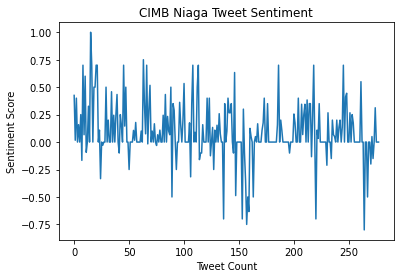

In [30]:
import matplotlib.pyplot as plt
plt.plot(polar)
plt.title('CIMB Niaga Tweet Sentiment')
plt.ylabel('Sentiment Score')
plt.xlabel('Tweet Count')
plt.show()